### Distributions

These functions let us explore the prior distribution formulations. 

In [10]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

import tfscreen 


### dk_geno

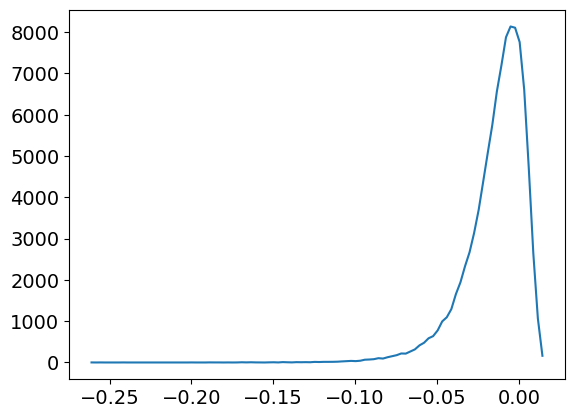

In [11]:

def link(dk_geno,
         k_geno_hyper_loc=-3.5,
         dk_geno_hyper_scale=0.5,
         dk_geno_hyper_shift=0.02):
    """
    Map natural to latent scale. 
    """

    v = np.log(dk_geno_hyper_shift - dk_geno)
    dk_geno_offset = (v - dk_geno_hyper_loc)/dk_geno_hyper_scale

    return dk_geno_offset
    
def inverse_link(dk_geno_offset=None,
                 dk_geno_hyper_loc=-3.5,
                 dk_geno_hyper_scale = 0.5,
                 dk_geno_hyper_shift = 0.02):
    """
    Map latent to natural scale.
    """

    if dk_geno_offset is None:
        dk_geno_offset = np.random.normal(0,1,100000)
    
    dk_geno_lognormal = np.exp(dk_geno_hyper_loc + dk_geno_offset * dk_geno_hyper_scale)
    dk_geno = dk_geno_hyper_shift - dk_geno_lognormal

    return dk_geno


counts, edges = np.histogram(inverse_link(),bins=100)
centers = (edges[1:] - edges[:-1])/2 + edges[:-1]

plt.plot(centers,counts)

    
    
    



### activity

### theta min and max

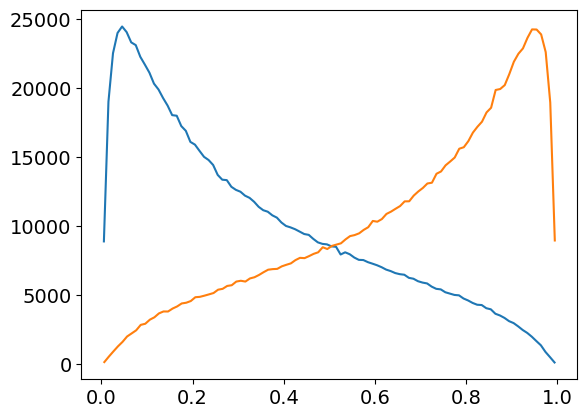

theta_min_guess: -1.2962926527776268
theta_max_guess: 2.6296259861109594


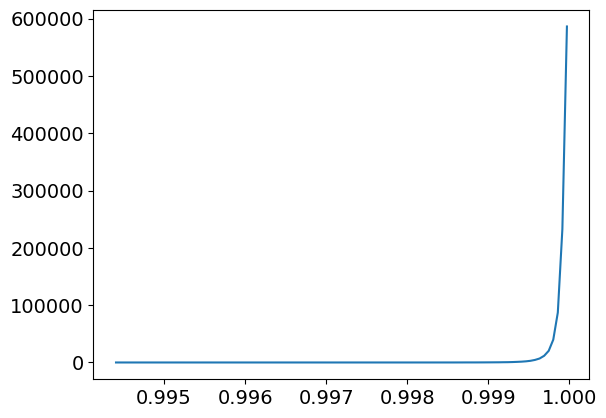

In [13]:

def link(theta,
         logit_theta_hyper_loc=-1,
         logit_theta_hyper_scale=1.5):
    """
    Map natural to latent scale. 
    """

    v = -np.log((1 - theta)/theta)
    return (v - logit_theta_hyper_loc)/logit_theta_hyper_scale
    
    
def inverse_link(logit_theta_offset=None,
                 logit_theta_hyper_loc=-1,
                 logit_theta_hyper_scale=1.5):
    """
    Map latent to natural scale.
    """

    if logit_theta_offset is None:
        logit_theta_offset = np.random.normal(0,1,1000000)
    
    x = logit_theta_hyper_loc + logit_theta_offset * logit_theta_hyper_scale
    theta_min = 1/(1 + np.exp(-x))

    return theta_min


# Figure out shape of priors
counts, edges = np.histogram(inverse_link(),bins=100)
centers = (edges[1:] - edges[:-1])/2 + edges[:-1]
plt.plot(centers,counts)
counts, edges = np.histogram(inverse_link(logit_theta_hyper_loc=1),bins=100)
centers = (edges[1:] - edges[:-1])/2 + edges[:-1]
plt.plot(centers,counts)
plt.show()

# Figure out guesses
print("theta_min_guess:",link(0.05))
print("theta_max_guess:",link(0.95))

# Figure out edges for wildtype (
counts, edges = np.histogram(inverse_link(logit_theta_hyper_loc=10,
                                          logit_theta_hyper_scale=1),
                             bins=100)
centers = (edges[1:] - edges[:-1])/2 + edges[:-1]
plt.plot(centers,counts)



### log K

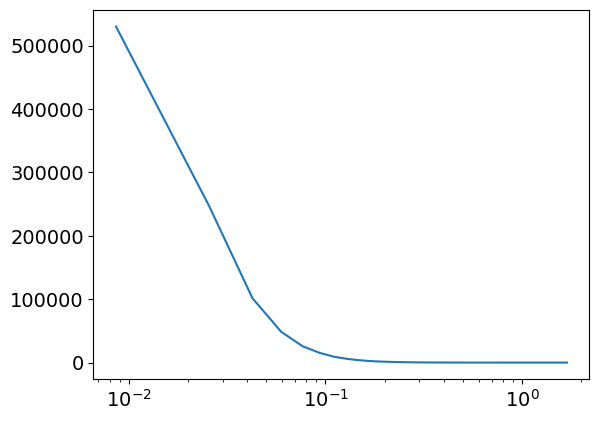

In [14]:
def link(K,
         log_hill_K_hyper_loc=-4.14433344452323,
         log_hill_K_hyper_scale=1):

    return (np.log(K)-log_hill_K_hyper_loc)/log_hill_K_hyper_scale

def inverse_link(log_hill_K_offset=None,
                 log_hill_K_hyper_loc=-4.14433344452323,
                 log_hill_K_hyper_scale=1):
    
    if log_hill_K_offset is None:
        log_hill_K_offset = np.random.normal(0,1,1000000)

    K = np.exp(log_hill_K_hyper_loc + log_hill_K_offset * log_hill_K_hyper_scale)

    return K


counts, edges = np.histogram(inverse_link(),bins=100)
centers = (edges[1:] - edges[:-1])/2 + edges[:-1]
plt.plot(centers,counts)
plt.xscale('log')


### kappa

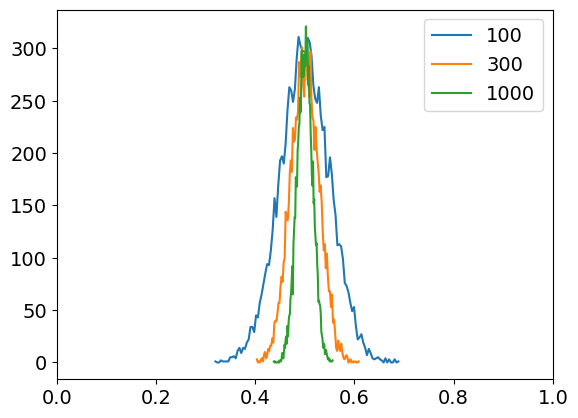

/var/folders/p_/hcs03cdj48nbsvw72d92tr040000gn/T/ipykernel_16313/2336726506.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


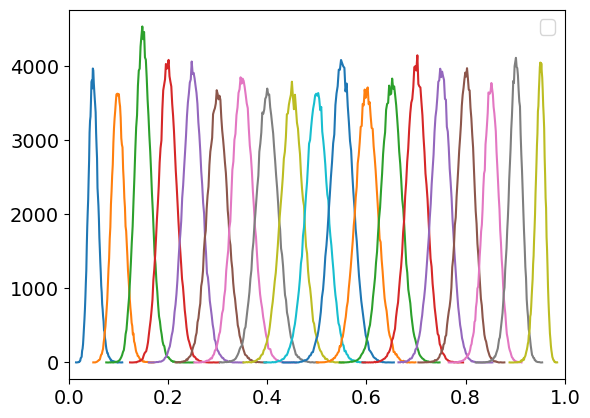

In [20]:
theta_kappa_loc = 5
theta_kappa_scale = 0.05


# counts, edges = np.histogram(kappa,bins=100)
# centers = (edges[1:] - edges[:-1])/2 + edges[:-1]
# plt.plot(centers,counts)
# plt.show()

mean_theta = 0.5 #np.clip(0.9, 1e-6, 1 - 1e-6)
#for kappa in [0.1,0.3,1.0,3,10,30,100,300]:
for kappa in [100,300,1000]:
    
    a = mean_theta * kappa
    b = (1.0 - mean_theta) * kappa
    
    samples = np.random.beta(a=a,b=b,size=10000)
    counts, edges = np.histogram(samples,bins=100)
    centers = (edges[1:] - edges[:-1])/2 + edges[:-1]
    plt.plot(centers,counts,label=kappa)

plt.xlim(0,1)
plt.legend()

plt.show()

def err_model(theta,
              theta_kappa_loc=25,
              theta_kappa_scale=0.05):

    kappa = np.random.gamma(theta_kappa_loc,
                            1/theta_kappa_scale,
                            100000)
    
    mean_theta = np.clip(theta, 1e-6, 1 - 1e-6)
    a = mean_theta * kappa
    b = (1.0 - mean_theta) * kappa

    samples = np.random.beta(a=a,b=b,size=100000).flatten()

    return samples

for theta in np.arange(0.05,1.0,0.05):

    samples = err_model(theta) #np.random.beta(a=a,b=b,size=100000)
    counts, edges = np.histogram(samples,bins=100)
    centers = (edges[1:] - edges[:-1])/2 + edges[:-1]
    plt.plot(centers,counts)

plt.xlim(0,1)
plt.legend()

plt.show()




    



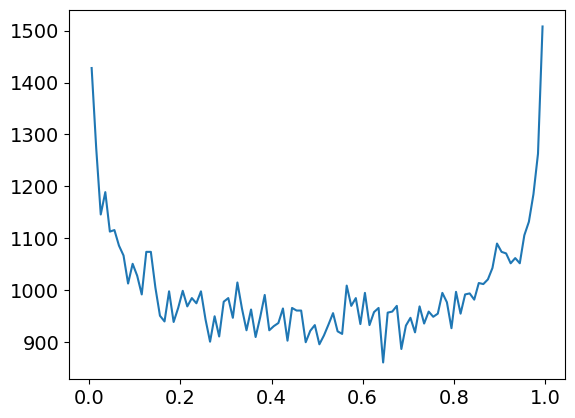

In [21]:
samples = np.random.beta(0.9,0.9,100000)
counts, edges = np.histogram(samples,bins=100)
centers = (edges[1:] - edges[:-1])/2 + edges[:-1]
plt.plot(centers,counts,label=kappa)